In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma
import numpy.matlib
import cv2, numpy as np
from math import pi
from skimage import io, color
from sklearn.cluster import KMeans


In [61]:
def enhence_contrast(img):
    alpha = 1.95
    beta = -150
    result  = cv2.addWeighted(img, alpha, np.zeros(img.shape, img.dtype), 0, beta)
    return result

In [62]:
def visualize_colors(cluster, centroids):
    # Get the number of different clusters, create histogram, and normalize
    labels = np.arange(0, len(np.unique(cluster.labels_)) + 1)
    (hist, _) = np.histogram(cluster.labels_, bins = labels)
    hist = hist.astype("float")
    hist /= hist.sum()

    # Create frequency rect and iterate through each cluster's color and percentage
    rect = np.zeros((50, 300, 3), dtype=np.uint8)
    colors = sorted([(percent, color) for (percent, color) in zip(hist, centroids)])
    start = 0
    for (percent, color) in colors:
        print(color, "{:0.2f}%".format(percent * 100))
        end = start + (percent * 300)
        cv2.rectangle(rect, (int(start), 0), (int(end), 50), \
                      color.astype("uint8").tolist(), -1)
        start = end
    return rect

In [63]:
def centroid_histogram(clt):
	# grab the number of different clusters and create a histogram
	# based on the number of pixels assigned to each cluster
	numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
	(hist, _) = np.histogram(clt.labels_, bins = numLabels)
 
	# normalize the histogram, such that it sums to one
	hist = hist.astype("float")
	hist /= hist.sum()
 
	# return the histogram
	return hist

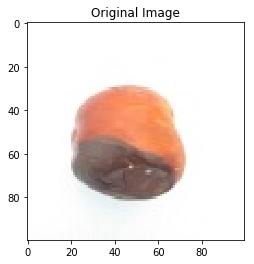

In [64]:
# Load Damage Image and Show The image
img = cv2.imread('images/17.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #convert bgr image to rgb
plt.imshow(img)
plt.title("Original Image")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


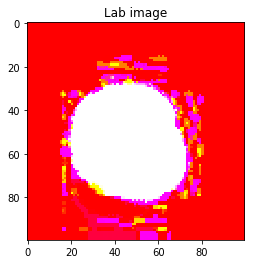

In [65]:


#CONVERT RGB IMAGE TO L*a*b
lab = color.rgb2lab(img)
plt.imshow(lab)
plt.title("Lab image")
plt.show()

# lab = cv2.cvtColor(img,cv2.COLOR_BGR2LAB)
# l,a,b=cv2.split(lab)
# lab=cv2.merge((l,a,b))
# plt.imshow(lab)
# plt.title("lab")
# plt.show()

Z = lab.reshape((-1,3))
# convert to np.float32
Z = np.float32(Z)

#pic_n = lab.reshape(lab.shape[0]*lab.shape[1], lab.shape[2])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


cluster labels: 
[0 0 0 ... 0 0 0]


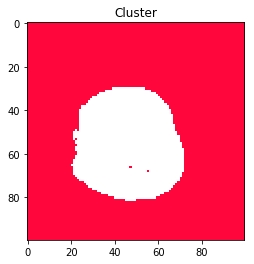

[44.842422   9.279727   7.0374928] 10.35%
[69.19222 31.84176 35.48546] 11.04%
[9.9333122e+01 3.0778885e-02 2.3612165e-01] 78.61%


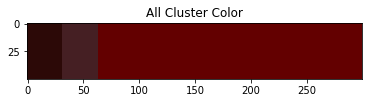

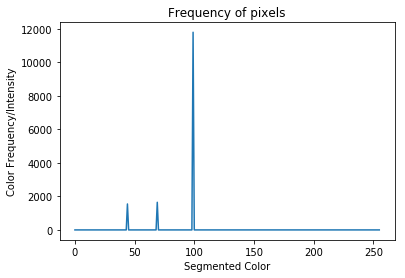

In [66]:
# Find and display most dominant colors
cluster = KMeans(n_clusters=3).fit(Z) # APPLY K-MEANS CLUSTERING
print("cluster labels: ")
print(cluster.labels_)


pic2show = cluster.cluster_centers_[cluster.labels_]
cluster_pic = pic2show.reshape(img.shape[0], img.shape[1], img.shape[2])
plt.imshow(cluster_pic) 
#plt.imshow(cv2.cvtColor(cluster_pic, cv2.COLOR_BGR2RGB))
plt.title('Cluster')
plt.show()

visualize = visualize_colors(cluster, cluster.cluster_centers_)
#visualize = cv2.cvtColor(visualize, cv2.COLOR_RGB2BGR)
plt.imshow(visualize) 
#plt.imshow(cv2.cvtColor(visualize, cv2.COLOR_BGR2RGB))
plt.title("All Cluster Color")
plt.show()



  
# show the plotting graph of an image 
histr = cv2.calcHist([visualize],[0],None,[256],[0,256]) 
plt.plot(histr)
plt.title("Frequency of pixels")
plt.xlabel("Segmented Color")
plt.ylabel("Color Frequency/Intensity")
plt.show() 


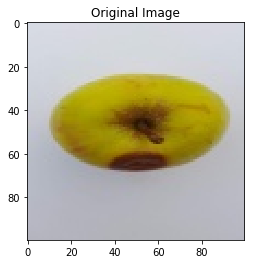

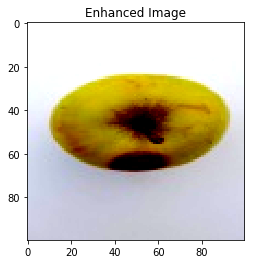

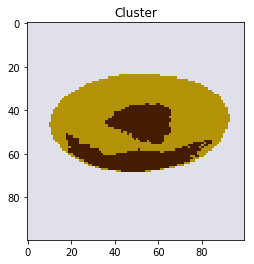

[68.47963801 28.17533937  0.86538462] 8.84%
[179.00933202 146.70039293   5.46905697] 20.36%
[223.96186441 224.71497175 232.33206215] 70.80%


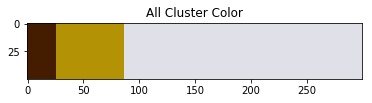

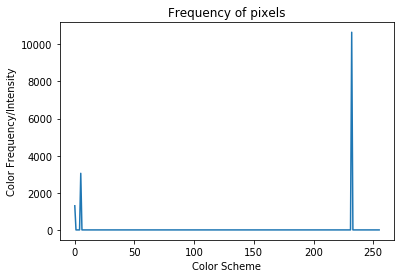

In [68]:
import cv2, numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def visualize_colors(cluster, centroids):
    # Get the number of different clusters, create histogram, and normalize
    labels = np.arange(0, len(np.unique(cluster.labels_)) + 1)
    (hist, _) = np.histogram(cluster.labels_, bins = labels)
    hist = hist.astype("float")
    hist /= hist.sum()

    # Create frequency rect and iterate through each cluster's color and percentage
    rect = np.zeros((50, 300, 3), dtype=np.uint8)
    colors = sorted([(percent, color) for (percent, color) in zip(hist, centroids)])
    start = 0
    for (percent, color) in colors:
        print(color, "{:0.2f}%".format(percent * 100))
        end = start + (percent * 300)
        cv2.rectangle(rect, (int(start), 0), (int(end), 50), \
                      color.astype("uint8").tolist(), -1)
        start = end
    return rect

# Load image and convert to a list of pixels
image = cv2.imread('images/1.jpg')


image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title("Original Image")
plt.show()

enh = enhence_contrast(image)
plt.imshow(enh)
plt.title("Enhanced Image")
plt.show()

reshape = enh.reshape((enh.shape[0] * enh.shape[1], 3))


# Find and display most dominant colors
cluster = KMeans(n_clusters=3).fit(reshape)
center = np.uint8(cluster.cluster_centers_)
res = center[cluster.labels_.flatten()]
segmented_image = res.reshape((image.shape))

# Now convert back into uint8, and make original image
center = np.uint8(cluster.cluster_centers_)
res = center[cluster.labels_.flatten()]
res2 = res.reshape((image.shape))
plt.imshow(segmented_image)
#plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.title('Cluster')
plt.show()

##-----------------------------to show color bar----------------------------------
visualize = visualize_colors(cluster, cluster.cluster_centers_)
visualize = cv2.cvtColor(visualize, cv2.COLOR_RGB2BGR)
#plt.imshow(visualize)
plt.imshow(cv2.cvtColor(visualize, cv2.COLOR_BGR2RGB))
plt.title("All Cluster Color")
plt.show()
##-----------X------------------to show color bar------------------X----------------


enh
# --------------------------------------show the plotting graph of an image ----------------------
histr = cv2.calcHist([visualize],[0],None,[256],[0,256]) 
plt.plot(histr)
plt.title("Frequency of pixels")
plt.xlabel("Color Scheme")
plt.ylabel("Color Frequency/Intensity")
plt.show() 
# --------------------------------------show the plotting graph of an image ----------------------